# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, and arch.

In [2]:
!pip install arch

In [3]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

# Load and Explore the Dataset
Load the dataset 'TSSDA-Exp12.csv' using pandas and explore its structure and contents.

   Year  Month  Oklahoma Spot Price  Lousiana Spot Price
0  1988      1                1.875                2.065
1  1988      2                1.898                1.988
2  1988      3                1.643                1.818
3  1988      4                1.332                1.493
4  1988      5                1.262                1.383
              Year      Month  Oklahoma Spot Price  Lousiana Spot Price
count    48.000000  48.000000            48.000000            48.000000
mean   1989.458333   6.500000             1.445604             1.650563
std       1.090741   3.488583             0.265989             0.321874
min    1988.000000   1.000000             1.020000             1.117000
25%    1988.750000   3.750000             1.252000             1.409250
50%    1989.500000   6.500000             1.352500             1.561500
75%    1990.000000   9.250000             1.628500             1.849500
max    1991.000000  12.000000             2.203000             2.420000


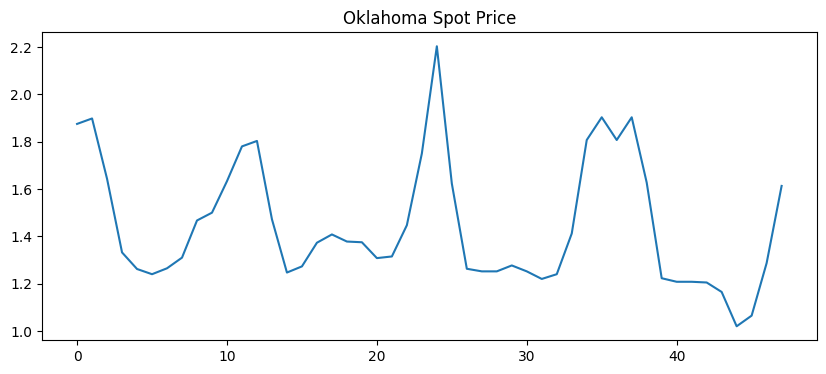

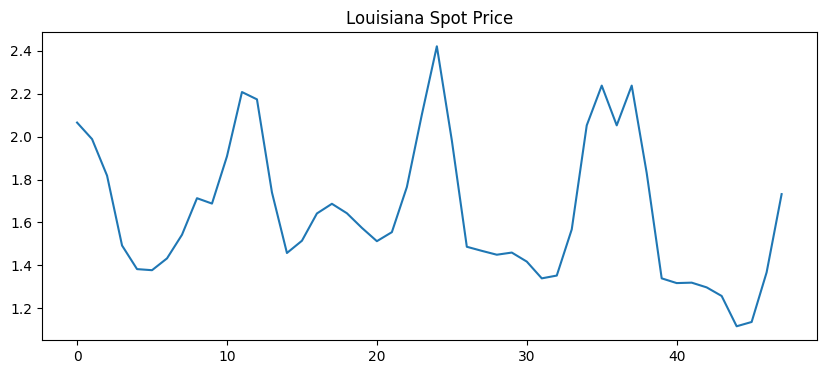

In [4]:
# Load the dataset
data = pd.read_csv('TSSDA-Exp12.csv')

# Display the first few rows of the dataset
print(data.head())

# Display the summary statistics of the dataset
print(data.describe())

# Plot the Oklahoma Spot Price
plt.figure(figsize=(10,4))
plt.plot(data['Oklahoma Spot Price'])
plt.title('Oklahoma Spot Price')
plt.show()

# Plot the Louisiana Spot Price
plt.figure(figsize=(10,4))
plt.plot(data['Lousiana Spot Price'])
plt.title('Louisiana Spot Price')
plt.show()

# Data Preprocessing
Preprocess the data by handling missing values, converting data types if necessary, and creating a datetime index.

In [5]:
# Convert 'Year' and 'Month' columns to datetime format
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Check for missing values
print(data.isnull().sum())

# If there are any missing values, fill them with the previous value
data.fillna(method='ffill', inplace=True)

# Check the data types of the columns
print(data.dtypes)

# Convert the spot price columns to float, if necessary
data['Oklahoma Spot Price'] = data['Oklahoma Spot Price'].astype(float)
data['Lousiana Spot Price'] = data['Lousiana Spot Price'].astype(float)

# Display the preprocessed data
print(data.head())

Year                   0
Month                  0
Oklahoma Spot Price    0
Lousiana Spot Price    0
dtype: int64
Year                     int64
Month                    int64
Oklahoma Spot Price    float64
Lousiana Spot Price    float64
dtype: object
            Year  Month  Oklahoma Spot Price  Lousiana Spot Price
Date                                                             
1988-01-01  1988      1                1.875                2.065
1988-02-01  1988      2                1.898                1.988
1988-03-01  1988      3                1.643                1.818
1988-04-01  1988      4                1.332                1.493
1988-05-01  1988      5                1.262                1.383


/tmp/ipykernel_23197/3405860720.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


# Visualize the Data
Visualize the data using matplotlib to understand the trends and patterns in the spot prices.

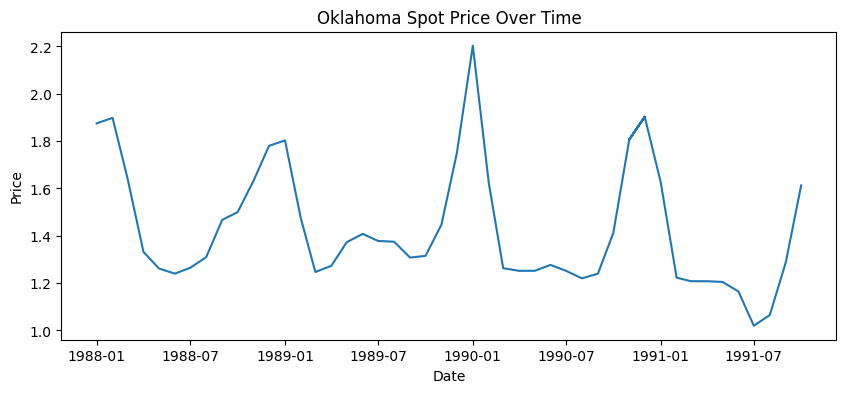

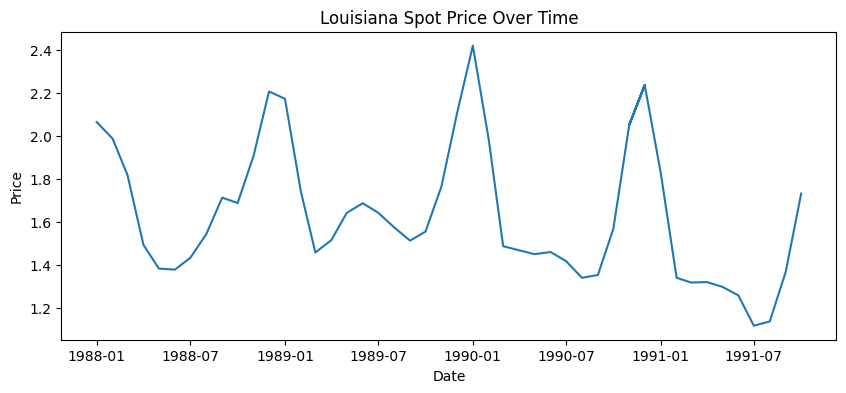

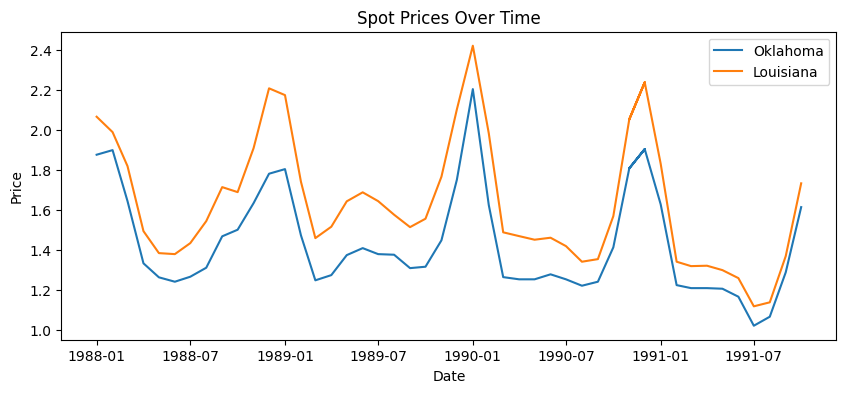

In [6]:
# Visualize the Data
# Plot the Oklahoma Spot Price over time
plt.figure(figsize=(10,4))
plt.plot(data.index, data['Oklahoma Spot Price'])
plt.title('Oklahoma Spot Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot the Louisiana Spot Price over time
plt.figure(figsize=(10,4))
plt.plot(data.index, data['Lousiana Spot Price'])
plt.title('Louisiana Spot Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot both spot prices on the same graph for comparison
plt.figure(figsize=(10,4))
plt.plot(data.index, data['Oklahoma Spot Price'], label='Oklahoma')
plt.plot(data.index, data['Lousiana Spot Price'], label='Louisiana')
plt.title('Spot Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Implement the GARCH Model
Implement the GARCH model using the arch library on the spot price data.

/home/codespace/.python/current/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.06928. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                      Constant Mean - GARCH Model Results                      
Dep. Variable:     Oklahoma Spot Price   R-squared:                       0.000
Mean Model:              Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       GARCH   Log-Likelihood:                3.11735
Distribution:                   Normal   AIC:                           1.76529
Method:             Maximum Likelihood   BIC:                           9.25010
                                         No. Observations:                   48
Date:                 Mon, Apr 01 2024   Df Residuals:                       47
Time:                         08:34:27   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.3126  6.094e-02     21.538 6.811e-103 [  1.1

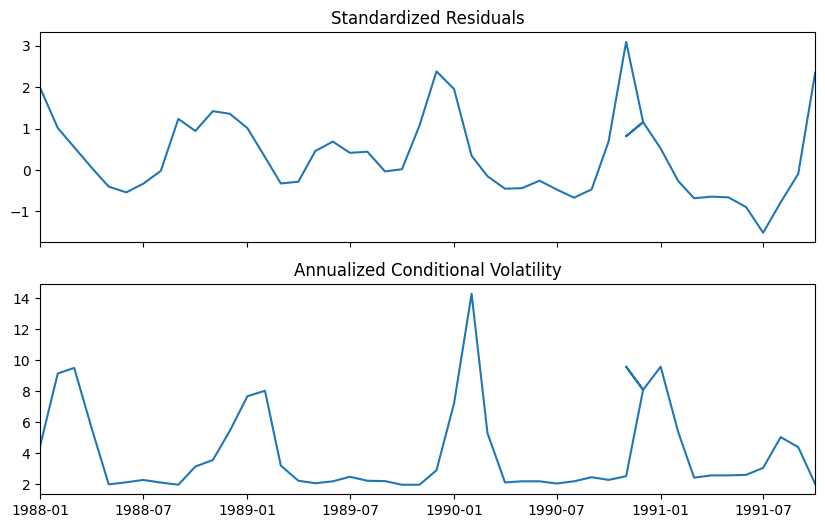

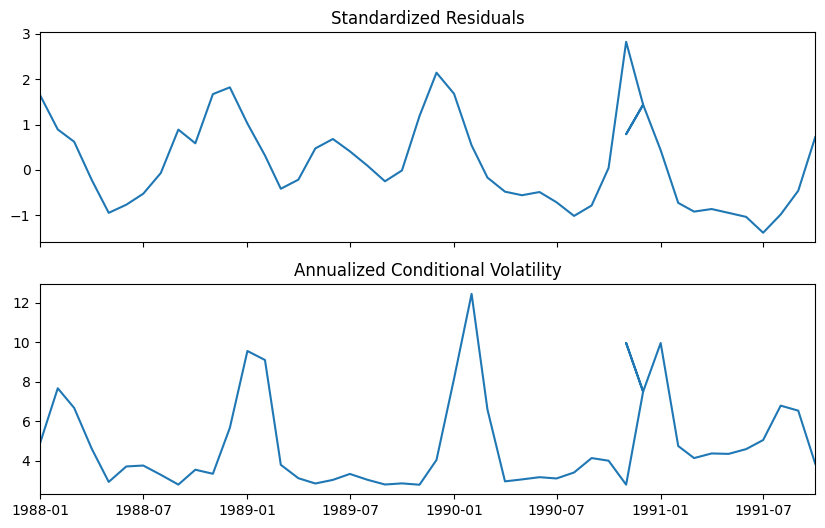

In [7]:
# Fit the GARCH model to the Oklahoma Spot Price
model_oklahoma = arch_model(data['Oklahoma Spot Price'], vol='Garch', p=1, q=1)
model_fit_oklahoma = model_oklahoma.fit(disp='off')

# Display the summary of the model
print(model_fit_oklahoma.summary())

# Fit the GARCH model to the Louisiana Spot Price
model_louisiana = arch_model(data['Lousiana Spot Price'], vol='Garch', p=1, q=1)
model_fit_louisiana = model_louisiana.fit(disp='off')

# Display the summary of the model
print(model_fit_louisiana.summary())

# Plot the actual returns against the predicted volatility for Oklahoma
fig = model_fit_oklahoma.plot(annualize='D')
fig.set_figwidth(10)
fig.set_figheight(6)
plt.show()

# Plot the actual returns against the predicted volatility for Louisiana
fig = model_fit_louisiana.plot(annualize='D')
fig.set_figwidth(10)
fig.set_figheight(6)
plt.show()

# Model Fitting and Summary
Fit the GARCH model to the data and display the model summary.

/home/codespace/.python/current/lib/python3.10/site-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.06928. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                      Constant Mean - GARCH Model Results                      
Dep. Variable:     Oklahoma Spot Price   R-squared:                       0.000
Mean Model:              Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       GARCH   Log-Likelihood:                3.11735
Distribution:                   Normal   AIC:                           1.76529
Method:             Maximum Likelihood   BIC:                           9.25010
                                         No. Observations:                   48
Date:                 Mon, Apr 01 2024   Df Residuals:                       47
Time:                         08:34:28   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             1.3126  6.094e-02     21.538 6.811e-103 [  1.1

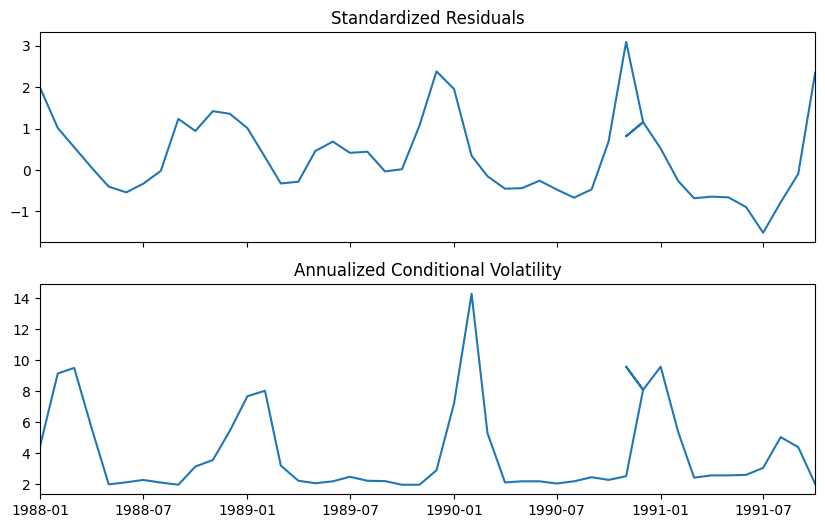

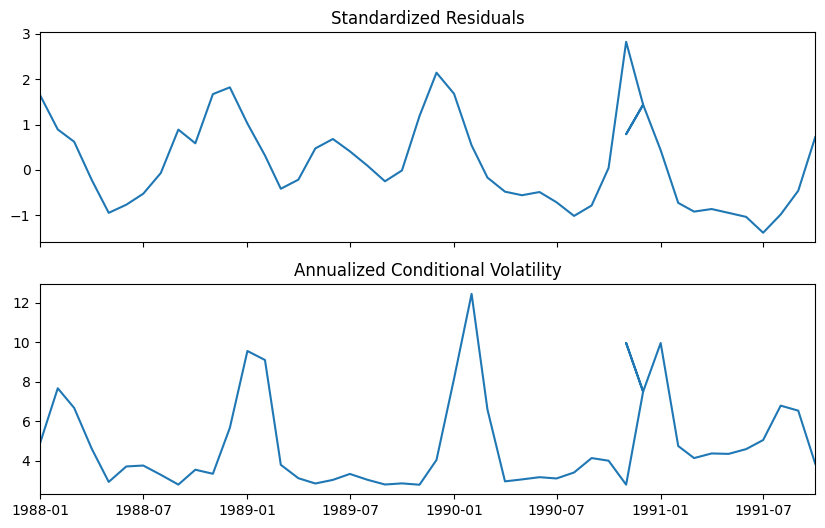

In [8]:
# Fit the GARCH model to the Oklahoma Spot Price
model_oklahoma = arch_model(data['Oklahoma Spot Price'], vol='Garch', p=1, q=1)
model_fit_oklahoma = model_oklahoma.fit(disp='off')

# Display the summary of the model
print(model_fit_oklahoma.summary())

# Fit the GARCH model to the Louisiana Spot Price
model_louisiana = arch_model(data['Lousiana Spot Price'], vol='Garch', p=1, q=1)
model_fit_louisiana = model_louisiana.fit(disp='off')

# Display the summary of the model
print(model_fit_louisiana.summary())

# Plot the actual returns against the predicted volatility for Oklahoma
fig = model_fit_oklahoma.plot(annualize='D')
fig.set_figwidth(10)
fig.set_figheight(6)
plt.show()

# Plot the actual returns against the predicted volatility for Louisiana
fig = model_fit_louisiana.plot(annualize='D')
fig.set_figwidth(10)
fig.set_figheight(6)
plt.show()

# Model Diagnostics
Perform model diagnostics to check the residuals and the model's goodness of fit.

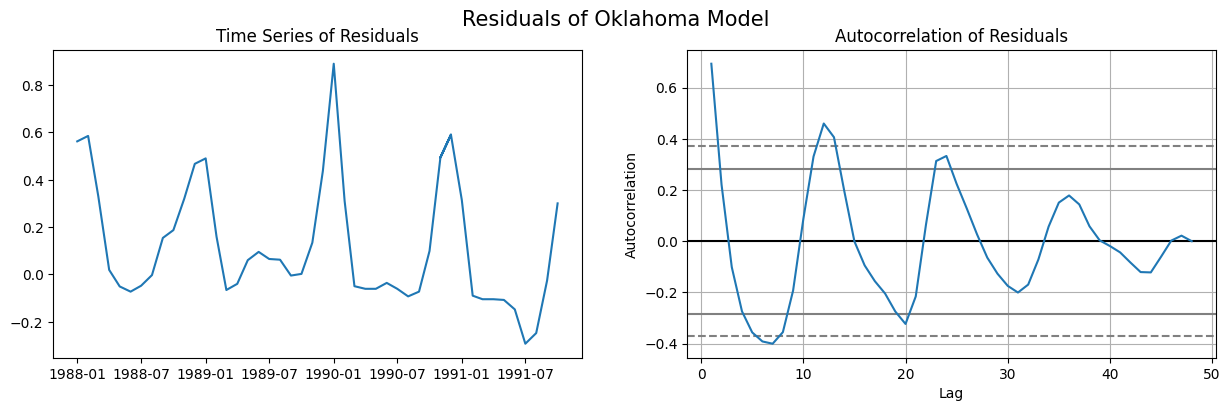

Ljung-Box test statistic: lb_stat
Ljung-Box p-value: lb_pvalue


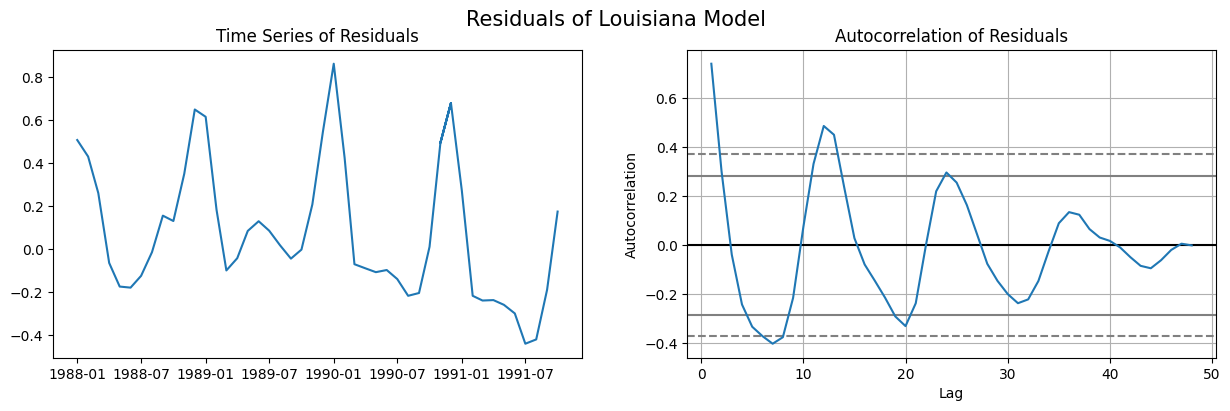

Ljung-Box test statistic: lb_stat
Ljung-Box p-value: lb_pvalue


In [9]:
# Perform model diagnostics for the Oklahoma model
residuals_oklahoma = model_fit_oklahoma.resid
fig, ax = plt.subplots(1,2, figsize=(15,4))
fig.suptitle('Residuals of Oklahoma Model', fontsize=15)
# Plot the residuals
ax[0].plot(residuals_oklahoma)
ax[0].set_title('Time Series of Residuals')
# Plot the ACF of the residuals
pd.plotting.autocorrelation_plot(residuals_oklahoma, ax=ax[1])
ax[1].set_title('Autocorrelation of Residuals')
plt.show()

# Perform the Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
lb_test_stat, lb_p_value = acorr_ljungbox(residuals_oklahoma)
print(f'Ljung-Box test statistic: {lb_test_stat}')
print(f'Ljung-Box p-value: {lb_p_value}')

# Perform model diagnostics for the Louisiana model
residuals_louisiana = model_fit_louisiana.resid
fig, ax = plt.subplots(1,2, figsize=(15,4))
fig.suptitle('Residuals of Louisiana Model', fontsize=15)
# Plot the residuals
ax[0].plot(residuals_louisiana)
ax[0].set_title('Time Series of Residuals')
# Plot the ACF of the residuals
pd.plotting.autocorrelation_plot(residuals_louisiana, ax=ax[1])
ax[1].set_title('Autocorrelation of Residuals')
plt.show()

# Perform the Ljung-Box test
lb_test_stat, lb_p_value = acorr_ljungbox(residuals_louisiana)
print(f'Ljung-Box test statistic: {lb_test_stat}')
print(f'Ljung-Box p-value: {lb_p_value}')

# Forecasting with the GARCH Model
Use the fitted GARCH model to make forecasts on future spot prices.

Oklahoma Spot Price Forecast:
                 h.1       h.2       h.3       h.4       h.5
Date                                                        
1988-01-01  0.331930  0.347523  0.363116  0.378709  0.394302
1988-02-01  0.358331  0.373924  0.389517  0.405110  0.420704
1988-03-01  0.124782  0.140376  0.155969  0.171562  0.187155
1988-04-01  0.015971  0.031564  0.047157  0.062751  0.078344
1988-05-01  0.018150  0.033743  0.049336  0.064929  0.080522


Louisiana Spot Price Forecast:
                 h.1       h.2       h.3       h.4       h.5
Date                                                        
1988-01-01  0.233211  0.213773  0.198504  0.186509  0.177086
1988-02-01  0.176426  0.169166  0.163462  0.158982  0.155462
1988-03-01  0.084042  0.096593  0.106453  0.114198  0.120282
1988-04-01  0.033802  0.057127  0.075450  0.089843  0.101150
1988-05-01  0.054386  0.073297  0.088152  0.099822  0.108989


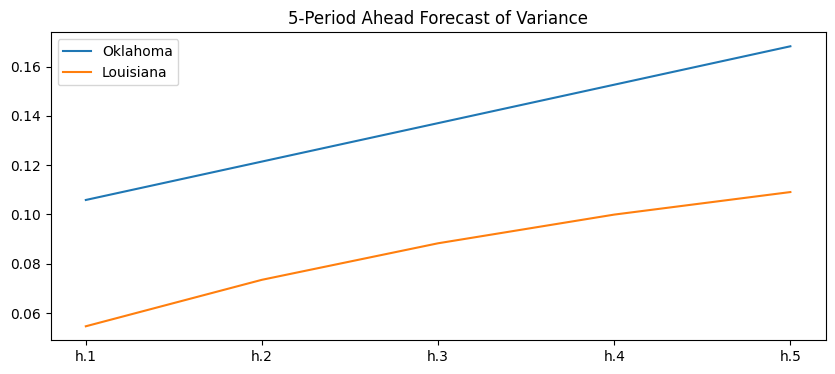

In [11]:
forecasts_oklahoma = model_fit_oklahoma.forecast(start=0, horizon=5)
forecasts_louisiana = model_fit_louisiana.forecast(start=0, horizon=5)

# Print the forecast mean and variance
print('Oklahoma Spot Price Forecast:')
print(forecasts_oklahoma.variance.dropna().head())
print('\n')
print('Louisiana Spot Price Forecast:')
print(forecasts_louisiana.variance.dropna().head())

# Plot the forecast variance
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(forecasts_oklahoma.variance.iloc[-1], label='Oklahoma')
plt.plot(forecasts_louisiana.variance.iloc[-1], label='Louisiana')
plt.title('5-Period Ahead Forecast of Variance')
plt.legend()
plt.show()